In [21]:
import pandas as pd
import numpy as np

In [ ]:
links, movies, ratings, tags = pd.read_csv("520_links.csv"), pd.read_csv("520_movies.csv"), pd.read_csv("520_ratings.csv"), pd.read_csv("520_tags.csv")

In [ ]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [ ]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [7]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [13]:
links[links.isnull().any(axis=1)]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [14]:
movies.describe()

,movieId,title,genres
count,9742,9742,9742
unique,9742,9737,951
top,movieId 1,Emma (1996),Drama
freq,1,2,1053


In [15]:
movies.dtypes

movieId    object
title      object
genres     object
dtype: object

# SCHEMA MAPPING
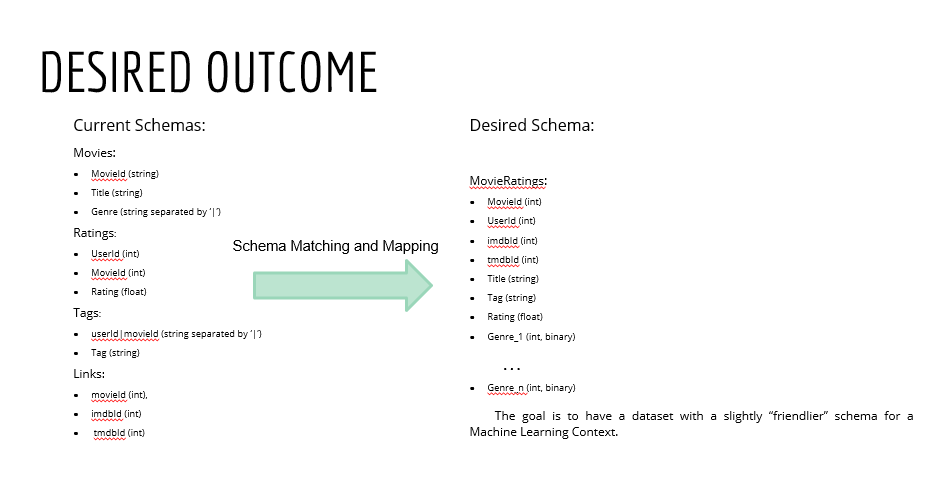

### Movies: movieId (string) -> movieId (int)

In [17]:
movies["movieId"] = movies["movieId"].map(lambda x: int(x.split(" ")[-1]))

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
movies.genres
out = []
for genre in movies.genres:
    out.append(genre.split('|'))

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
binarized_genres = binarizer.fit_transform(np.array(out))
GENRES = binarizer.classes_
binarized_genres

<ipython-input-22-956b971b5943>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binarized_genres = binarizer.fit_transform(np.array(out))


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Binarize Genres, "friendlier" format for ML

In [23]:
movies[GENRES] = binarized_genres
movies.drop(columns='genres', inplace=True)
movies

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now focus on tags dataframe

In [31]:
tags.head()

,tag,timestamp,userId|movieId
0,funny,1445714994,2|60756
1,Highly quotable,1445714996,2|60756
2,will ferrell,1445714992,2|60756
3,Boxing story,1445715207,2|89774
4,MMA,1445715200,2|89774


#### userId|movieId sring separated by "|" -> two new columns: userId (int) and movieId (int)

In [39]:
tags["userId"] = tags["userId|movieId"].map(lambda x: int(x.split("|")[0]))
tags["movieId"] = tags["userId|movieId"].map(lambda x: int(x.split("|")[1]))

In [41]:
tags.drop(columns="userId|movieId", inplace=True)

In [42]:
tags.head()

,tag,timestamp,userId,movieId
0,funny,1445714994,2,60756
1,Highly quotable,1445714996,2,60756
2,will ferrell,1445714992,2,60756
3,Boxing story,1445715207,2,89774
4,MMA,1445715200,2,89774


# EDA (Initial EDA was done with Vizier as well, further EDA can be done after applying transformations)

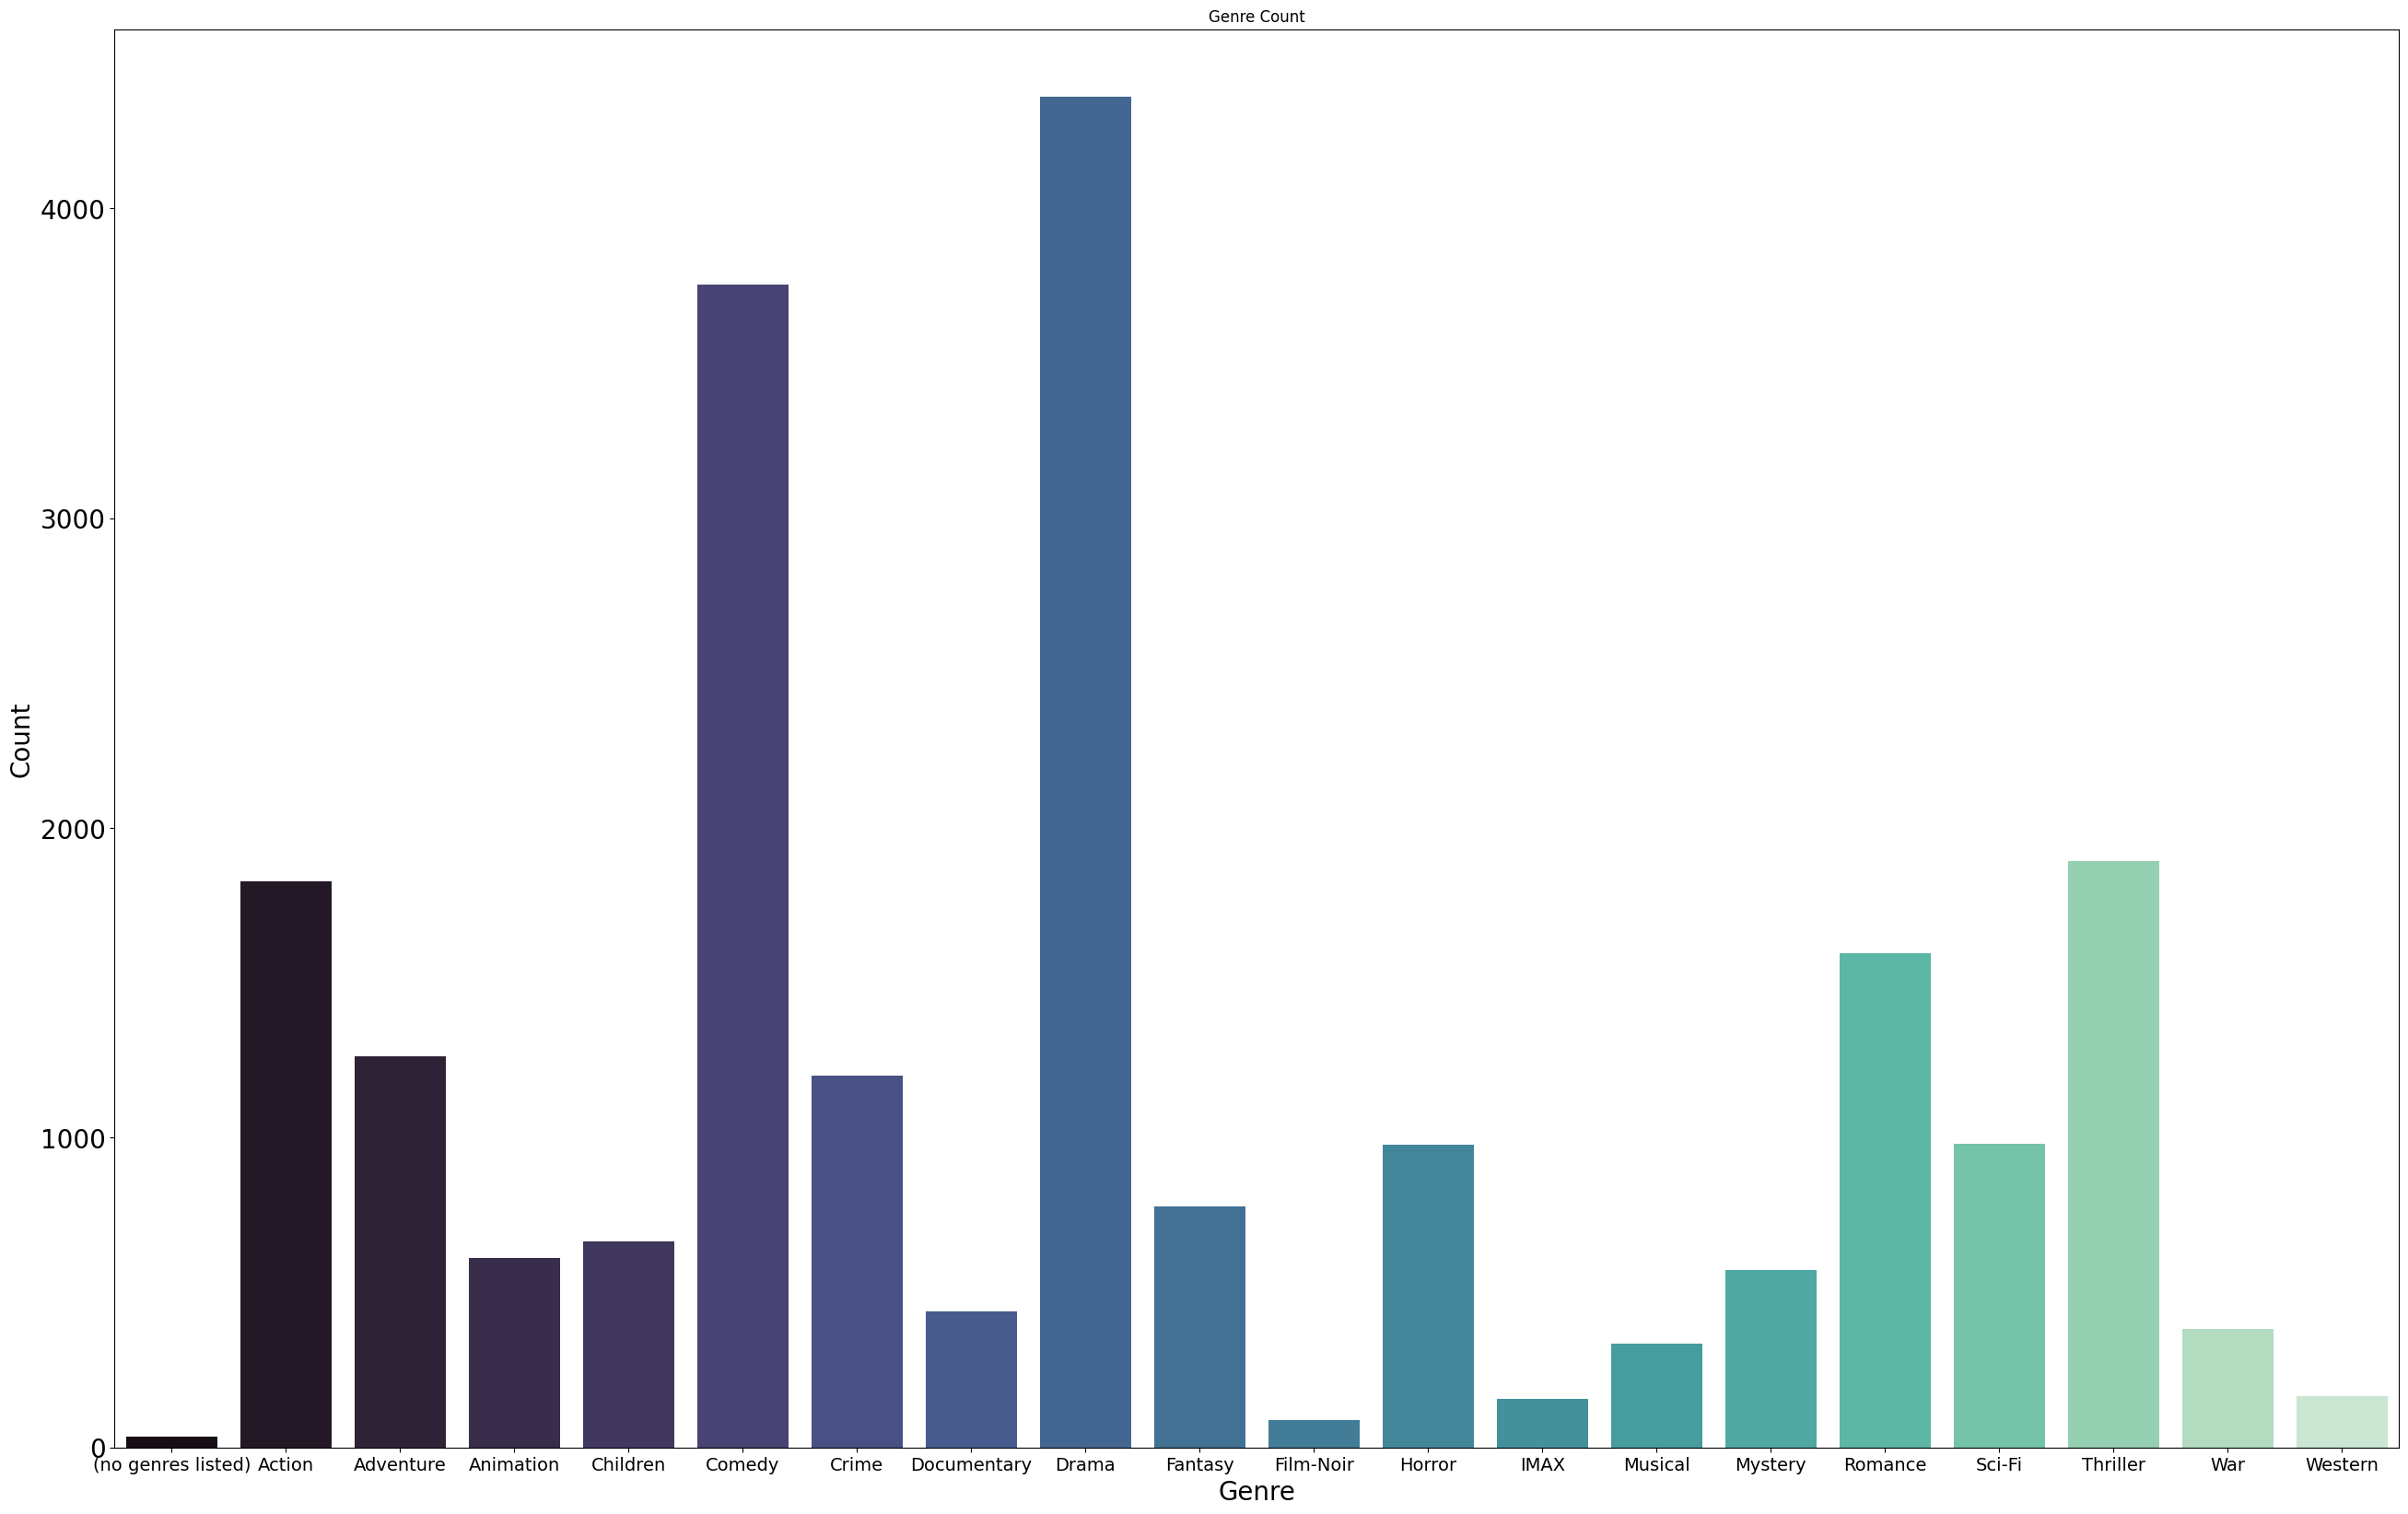

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

count = []
for c in GENRES:
    count.append(movies[c].sum())

plt.figure(figsize=(32, 20))
sns.barplot(x=GENRES, y=movies[GENRES].sum(), palette='mako')

plt.title('Genre Count')
plt.xlabel('Genre', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 20)
plt.show()

The mean rating is: 3.501556983616962
The mode rating is: 4.0


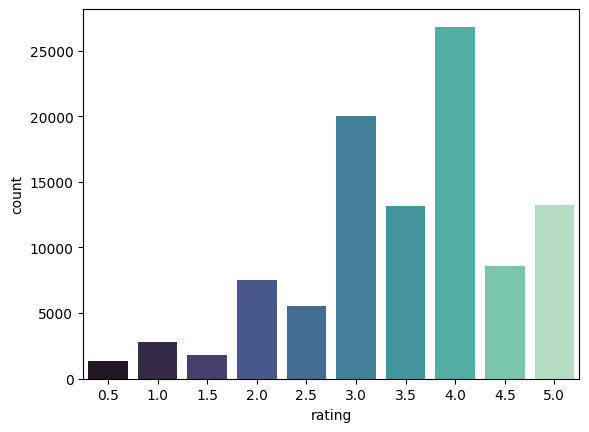

In [29]:
sns.countplot(data=ratings, x='rating', palette='mako')
print(f"The mean rating is: {ratings.rating.mean()}")
print(f"The mode rating is: {ratings.rating.mode()[0]}")

### Ratings based on movieId

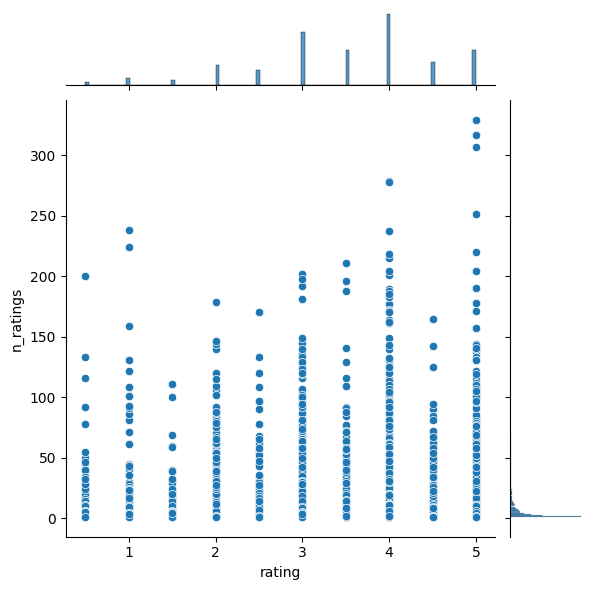

In [45]:
ratings['n_ratings'] = pd.DataFrame(ratings.groupby('movieId').count()['rating'])
sns.jointplot(x=ratings['rating'], y=ratings['n_ratings'], data=ratings)
plt.show()
ratings.drop(columns="n_ratings", inplace=True)

### timestamp in tag != timestamp in ratings

In [67]:
tags.columns = pd.Index(['tag', 'timestampTag', 'userId', 'movieId'])
ratings.columns = pd.Index(['userId', 'movieId', 'rating', 'timestampRatings'])

In [68]:
movies_ratings_df = pd.merge(movies, ratings, on=['movieId', 'movieId'], how='inner')
movies_ratings_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestampRatings
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [69]:
movies_ratings_links_df = pd.merge(movies_ratings_df, links, on=['movieId', 'movieId'], how='inner')
movies_ratings_links_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestampRatings,imdbId,tmdbId
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,17,4.5,1305696483,114709,862.0


In [70]:
movies_ratings_links_tags_df = pd.merge(movies_ratings_links_df, tags, on=['userId', 'movieId'], how='inner')
movies_ratings_links_tags_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Thriller,War,Western,userId,rating,timestampRatings,imdbId,tmdbId,tag,timestampTag
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,336,4.0,1122227329,114709,862.0,pixar,1139045764
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,474,4.0,978575760,114709,862.0,pixar,1137206825
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,567,3.5,1525286001,114709,862.0,fun,1525286013
3,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,fantasy,1528843929
4,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,magic board game,1528843932


In [71]:
movies_ratings_links_tags_df["tmdbId"].fillna(-1, inplace=True)

In [72]:
movies_ratings_links_tags_df.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Thriller,War,Western,userId,rating,timestampRatings,imdbId,tmdbId,tag,timestampTag
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,336,4.0,1122227329,114709,862.0,pixar,1139045764
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,474,4.0,978575760,114709,862.0,pixar,1137206825
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,567,3.5,1525286001,114709,862.0,fun,1525286013
3,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,fantasy,1528843929
4,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,magic board game,1528843932


In [73]:
movies_ratings_links_tags_df.isna().sum()

movieId               0
title                 0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
userId                0
rating                0
timestampRatings      0
imdbId                0
tmdbId                0
tag                   0
timestampTag          0
dtype: int64

In [74]:
movies_ratings_links_tags_df.to_csv("movieRatings520.csv", index=False)

In [75]:
movies_ratings_links_tags_df.columns

Index(['movieId', 'title', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'userId', 'rating',
       'timestampRatings', 'imdbId', 'tmdbId', 'tag', 'timestampTag'],
      dtype='object')